We have a data of customer, and metrics show their performance in sales and engagement (add to cart) 

**Business Target** 
   Segment customers that have the same performance (highest, medium, lowest) for trial program offering 
  
**General Idea** 
   Clustering each dimensions by K-Means and score each cluster. After that, sum of all score to define total score of each customer. 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Part A: Segment Customers

In [71]:
df = pd.read_csv('/Users/nguyenngockimnhu/Documents/Model Exercise/RFM_Customer Segmentation/RFM_customers_data.csv')
df.describe()

,frontend_id,backend_id,frequency_sales,frequency_add,recency,nmv
count,1.785700e+04,1.785700e+04,17857.000000,17857.000000,17857.000000,1.785700e+04
mean,6.593495e+06,4.847783e+06,5.074929,34.292602,5.360083,3.704053e+06
std,5.519320e+06,4.397933e+06,7.664240,13.121542,4.961335,7.408944e+06
min,1.280000e+02,1.280000e+02,0.000000,20.000000,1.000000,0.000000e+00
25%,1.160799e+06,1.160796e+06,1.000000,24.000000,2.000000,3.120000e+05
50%,6.267402e+06,3.423623e+06,3.000000,31.000000,4.000000,1.527000e+06
75%,1.064650e+07,7.773393e+06,7.000000,41.000000,7.000000,3.889000e+06
max,1.890549e+07,1.587951e+07,257.000000,120.000000,44.000000,2.009899e+08


In [72]:
df.pop('backend_id')

0        11463743
1         4635487
2         5571657
3         4212346
4          882104
           ...   
17852     4218783
17853     9162357
17854     2774615
17855     4369541
17856    14515828
Name: backend_id, Length: 17857, dtype: int64

In [73]:
#There is no null value in each column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17857 entries, 0 to 17856
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   frontend_id      17857 non-null  int64  
 1   frequency_sales  17857 non-null  int64  
 2   frequency_add    17857 non-null  int64  
 3   recency          17857 non-null  int64  
 4   nmv              17857 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 697.7 KB


**Step 1: Preprocess and visualize data**

In [74]:
df.isnull().sum()

frontend_id        0
frequency_sales    0
frequency_add      0
recency            0
nmv                0
dtype: int64

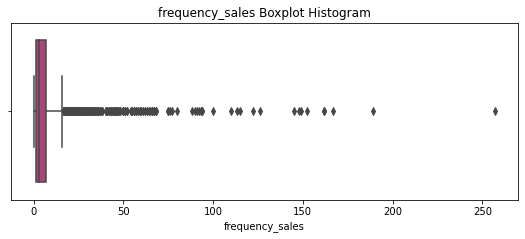

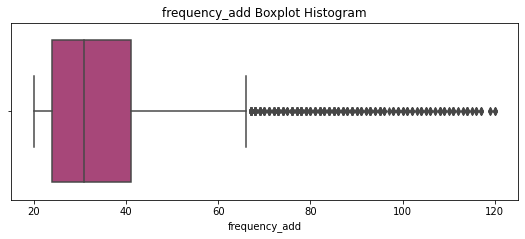

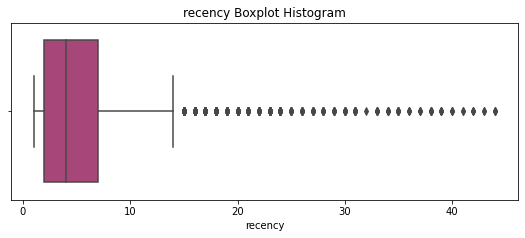

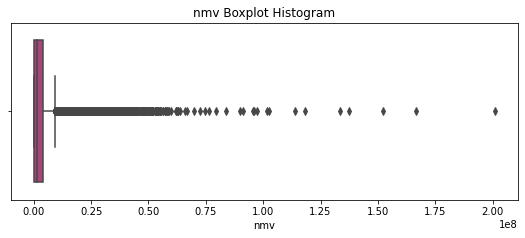

In [75]:
# Visualize numberic data: 

def visualize_boxplot(column,fig): 
    plt.figure(figsize = (20,15))
    plt.subplot(4,2,fig)
    plt.title(column+' Boxplot Histogram')
    sns.boxplot(df[column],palette='magma')

    
visualize_boxplot('frequency_sales',1)
visualize_boxplot('frequency_add',2)
visualize_boxplot('recency',3)
visualize_boxplot('nmv',4)

**Comments:**
- Seems that each dimension has many outliers, because we get data of all customers who maybe have add to carts but not sales. 
- We will not remove outliers, since we score each customer_id based on their performance. If we remove, we will missing many customers and the clustering will be underrated 

**Step 2: Apply K-Means model**

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')



1. Choosing K for model

In [77]:
# We try and apply each value of K in the model, and calculate the SSE (inertia_) at that K. 
# Then we visualize and decide which K is potential based on the Elbow method. 

def chose_k(feature): 
    sse={}
    df_main = df[[feature]]
    for k in range(1,10):
        k_mean = KMeans(n_clusters=k,init="k-means++",max_iter=1000).fit(df_main)
        df_main['cluster']= k_mean.labels_ 
        sse[k]=k_mean.inertia_    
    plt.figure(figsize=(8,3))
    plt.plot(list(sse.keys()),list(sse.values()))
    plt.xlabel(feature+' Number of cluster')
    
    plt.show()

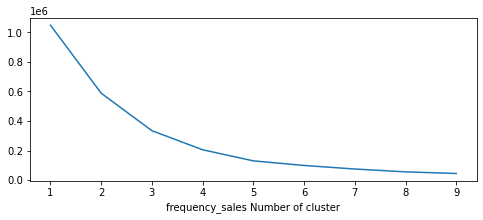

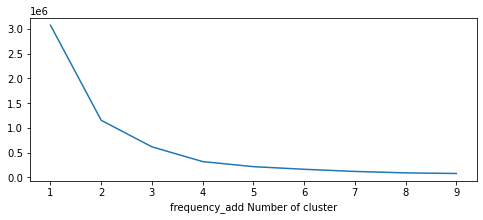

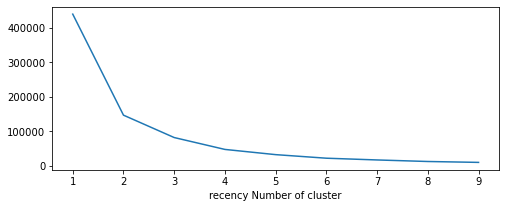

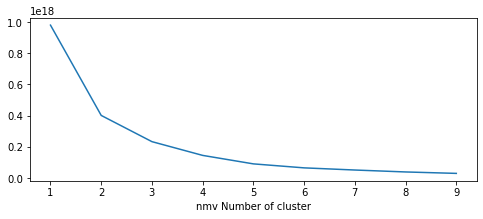

In [78]:
chose_k('frequency_sales')
chose_k('frequency_add')
chose_k('recency')
chose_k('nmv')

**Comments:** 

Base on the Elbow method, we will choose the K for each feature as below: 
- Frequency_sales: k = 5
- Frequency_add: k = 5 
- Recency: k = 5
- NMV: k = 5

2. Apply K-Means with K=5 to all feature

In [79]:
def apply_model(feature):
    k_means= KMeans(n_clusters = 5, init = 'k-means++')
    df[feature+' cluster'] = k_means.fit_predict (df[[feature]])

In [80]:
apply_model('frequency_sales')
apply_model('frequency_add')
apply_model('recency')
apply_model('nmv')

In [81]:
df

,frontend_id,frequency_sales,frequency_add,recency,nmv,frequency_sales cluster,frequency_add cluster,recency cluster,nmv cluster
0,14341885,0,36,6,0.0,0,3,2,1
1,7482651,0,35,2,0.0,0,3,0,1
2,8413145,0,35,4,0.0,0,3,2,1
3,7058197,0,35,8,0.0,0,3,3,1
4,882018,0,37,3,0.0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
17852,7064637,33,96,2,133258626.4,3,4,0,4
17853,12039107,90,113,1,137291528.0,3,4,0,4
17854,5614930,113,111,3,152101152.0,1,4,0,4
17855,7215746,10,90,2,166411700.0,4,4,0,4


3. Order these cluster following the feature values. 

In [82]:
#Because when k-means clustering, its cluster index is random, so we need to sort the cluster index following the value 
#in that cluster columns. 

def order_cluster(cluster_field_name, value_order_field_name, ascending, inplace=True): 
    new_cluster_field_name = 'new '+cluster_field_name 
    df_new = df.groupby(cluster_field_name)[value_order_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=value_order_field_name,ascending=ascending).reset_index(drop = True)
    df_new['index']=df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis =1 )
    df_final = df_final.rename(columns={'index':cluster_field_name})
    return df_final

In [83]:
df = order_cluster('frequency_sales cluster', 'frequency_sales', True)
df = order_cluster('frequency_add cluster', 'frequency_add', True)
df = order_cluster('nmv cluster', 'nmv', True)
df = order_cluster('recency cluster', 'recency', False)

df.head()

,frontend_id,frequency_sales,frequency_add,recency,nmv,frequency_sales cluster,frequency_add cluster,nmv cluster,recency cluster
0,14341885,0,36,6,0.0,0,1,0,3
1,8413145,0,35,4,0.0,0,1,0,3
2,6505179,0,36,7,0.0,0,1,0,3
3,952742,0,36,7,0.0,0,1,0,3
4,382602,0,37,5,0.0,0,1,0,3


In [84]:
df.groupby('nmv cluster')['nmv'].describe()

,count,mean,std,min,25%,50%,75%,max
nmv cluster,,,,,,,,
0,13866.0,1.250159e+06,1.222160e+06,0.00,0.00,9.579490e+05,2073450.0,4368080.0
1,3066.0,7.505799e+06,2.529944e+06,4372265.00,5359801.25,6.872650e+06,9212975.0,13950300.0
2,680.0,2.046666e+07,4.857916e+06,14001187.00,16213648.75,1.939652e+07,24116452.5,32215800.0
3,230.0,4.390813e+07,9.199399e+06,32256140.00,36510682.50,4.212596e+07,49667540.0,79261158.0
4,15.0,1.186398e+08,3.341386e+07,83648640.99,95719300.00,1.024550e+08,135275077.2,200989888.0


In [85]:
df['overall_score'] = df['frequency_sales cluster'] + df['frequency_add cluster'] + df['recency cluster'] + df['nmv cluster']

In [86]:
df.groupby('overall_score')['frontend_id'].count()

overall_score
1      636
2     1480
3     2443
4     3680
5     3151
6     2552
7     1639
8      954
9      567
10     330
11     174
12     132
13      78
14      27
15      13
16       1
Name: frontend_id, dtype: int64

In [91]:
df_mean = df.groupby('overall_score')[['frequency_sales','frequency_add','recency','nmv']].median()
df_count = df.groupby('overall_score')[['frontend_id']].count()
df_new = pd.merge(df_mean,df_count, on = 'overall_score').reset_index()
df_new.sort_values(by='overall_score',ascending=False)

,overall_score,frequency_sales,frequency_add,recency,nmv,frontend_id
15,16,113.0,111.0,3.0,1.521012e+08,1
14,15,126.0,109.0,2.0,5.489454e+07,13
13,14,51.0,99.0,1.0,4.405330e+07,27
12,13,37.0,90.0,1.0,2.808803e+07,78
11,12,23.0,80.0,1.0,2.548118e+07,132
10,11,16.0,67.0,1.0,2.162612e+07,174
9,10,13.5,54.0,2.0,1.467042e+07,330
8,9,11.0,49.0,2.0,9.424600e+06,567
7,8,8.0,47.0,2.0,5.426968e+06,954
6,7,6.0,44.0,2.0,3.289487e+06,1639


- Above table is the final table that shows the median and the number of customers per score.
- With this table, business can define which overall score that customers have to take action on them.

**After segment these customers into many groups and testing the a range score of customers, we collect data of a group customers that buy the FT. 
Next step, we will get the these data to predict which customer will buy the FT.**

#### Part B: Predict Customers

In [148]:
df_convert = pd.read_excel('/Users/nguyenngockimnhu/Documents/Model Exercise/RFM_Customer Segmentation/test.xlsx')
df_convert.describe()

,frontend_id,frequency_sales,frequency_add,recency,nmv,frequency_sales cluster,frequency_add cluster,nmv cluster,recency cluster,overall_score,convert
count,4.569000e+03,4569.000000,4569.000000,4569.000000,4.569000e+03,4569.000000,4569.000000,4569.000000,4569.000000,4569.000000,4569.000000
mean,6.609994e+06,5.119720,34.138980,5.344714,3.732259e+06,0.503611,1.056249,0.285620,3.123441,4.968921,0.276866
std,5.517244e+06,8.540717,13.273797,4.900947,7.962254e+06,0.686719,1.052741,0.607215,1.013955,2.260488,0.447499
min,4.060000e+02,0.000000,20.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.186180e+06,1.000000,24.000000,2.000000,2.820000e+05,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,6.260137e+06,4.000000,31.000000,4.000000,1.515000e+06,0.000000,1.000000,0.000000,3.000000,5.000000,0.000000
75%,1.063873e+07,7.000000,40.000000,7.000000,3.841500e+06,1.000000,2.000000,0.000000,4.000000,6.000000,1.000000
max,1.886686e+07,257.000000,117.000000,42.000000,2.009899e+08,4.000000,4.000000,4.000000,4.000000,16.000000,1.000000


**Step 1: Visualize Data**

In [149]:
def convert_plot(x):
    plt.figure(figsize=(8,5))
    plt.title(x+' vs Convert Plot')
    sns.boxplot(y=df_convert[x], x = df_convert['convert'], palette=('PuBuGn'))
    plt.show()

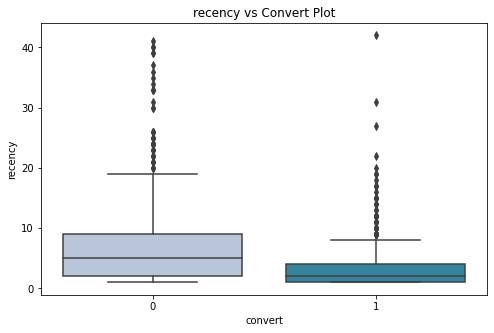

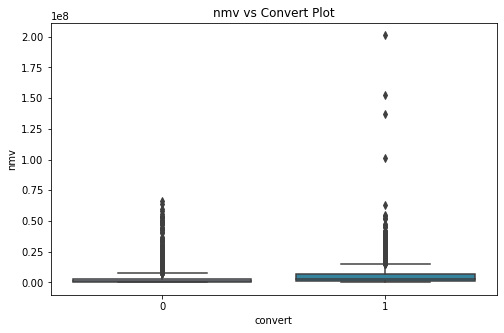

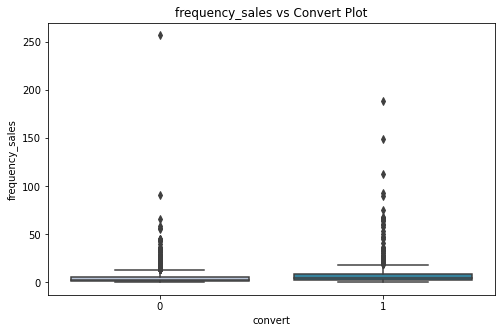

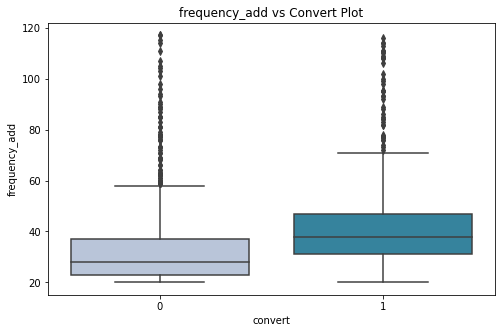

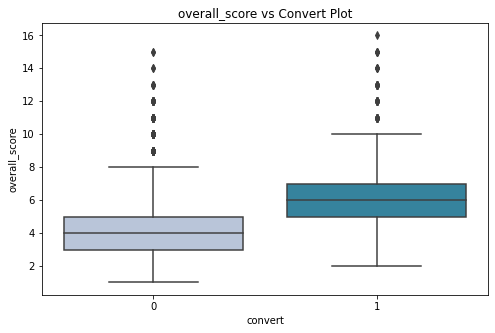

In [127]:
convert_plot('recency')
convert_plot('nmv')
convert_plot('frequency_sales')
convert_plot('frequency_add')
convert_plot('overall_score')

In [153]:
df_non_convert = df_convert[df_convert['convert'] == 1].groupby('overall_score')[['frontend_id']].count().reset_index()
df_had_convert = df_convert.groupby('overall_score')[['frontend_id']].count().reset_index()
df_convert_merge = pd.merge(df_non_convert,df_had_convert, on = 'overall_score', how = 'left')
df_convert_merge.rename(columns = {'frontend_id_x':'users_converted','frontend_id_y':'total_users'}, inplace = True)
df_convert_merge['percentage'] = df_convert_merge['users_converted'] / df_convert_merge['total_users']
df_convert_merge

,overall_score,users_converted,total_users,percentage
0,2,10,399,0.025063
1,3,10,629,0.015898
2,4,10,952,0.010504
3,5,441,848,0.520047
4,6,334,668,0.500000
5,7,182,378,0.481481
6,8,122,239,0.510460
7,9,69,127,0.543307
8,10,36,79,0.455696
9,11,15,44,0.340909


As we can see, users who high overall score will have high chance to get the convert

**Step 2: Apply Model**

**Split train/test:**

In [155]:
from sklearn.model_selection import train_test_split

In [159]:
x_data = df_convert[['frequency_sales', 'frequency_add','recency','nmv','overall_score']]                     
y_data = df_convert[['convert']]

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.33, random_state=42)

**Apply Model:**

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [166]:
# Support Vector Machine
svc = SVC()
svc.fit(x_train, y_train)
svm_Y_pred = svc.predict(x_test)
svc_accuracy = svc.score(x_train, y_train)
svc_accuracy

0.7265599477295002

In [167]:
# k-nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
knn_Y_pred = knn.predict(x_test)
knn_accuracy = knn.score(x_train, y_train)
knn_accuracy

0.821953609931395

In [172]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_Y_pred = decision_tree.predict(x_test)
decision_tree_accuracy = decision_tree.score(x_train, y_train)
decision_tree_accuracy

0.9852989219209408

In [174]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
random_forest_Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
random_forest_accuracy = random_forest.score(x_train, y_train)
random_forest_accuracy

0.9849722312969618

In [176]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
               'Decision Tree','Random Forest'],
    'Score': [svc_accuracy, knn_accuracy,
               decision_tree_accuracy, random_forest_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,0.985299
3,Random Forest,0.984972
1,KNN,0.821954
0,Support Vector Machines,0.726560
